In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
labels_df = pd.read_csv('data/secom_labels.data', sep=' ', header = None)
labels_df.columns = ['Label', 'Date']
labels_df['Date'] = pd.to_datetime(labels_df['Date'], format = "%d/%m/%Y %H:%M:%S")
print('labels_df shape = {}'.format(labels_df.shape))
labels_df.head()

labels_df shape = (1567, 2)


,Label,Date
0,-1,2008-07-19 11:55:00
1,-1,2008-07-19 12:32:00
2,1,2008-07-19 13:17:00
3,-1,2008-07-19 14:43:00
4,-1,2008-07-19 15:22:00


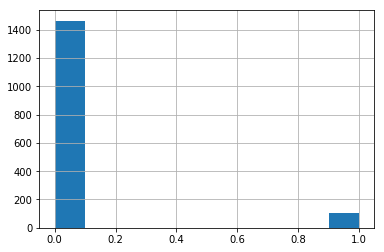

In [3]:
labels_df['Label'] = labels_df['Label'].apply(lambda x: 0 if x == -1 else 1)
labels_df['Label'].hist()

In [4]:
label_sum = labels_df['Label'].groupby(labels_df['Date'].dt.date).sum().reset_index()
label_count = labels_df['Label'].groupby(labels_df['Date'].dt.date).count().reset_index()
label_day = pd.merge(label_sum, label_count, on='Date')
label_day.columns = ['Date', 'Sum', 'Count']
label_day['Date'] = pd.to_datetime(label_day['Date'])
label_day.head()

,Date,Sum,Count
0,2008-07-19,3,12
1,2008-07-20,0,1
2,2008-07-21,1,2
3,2008-07-22,0,6
4,2008-07-23,0,2


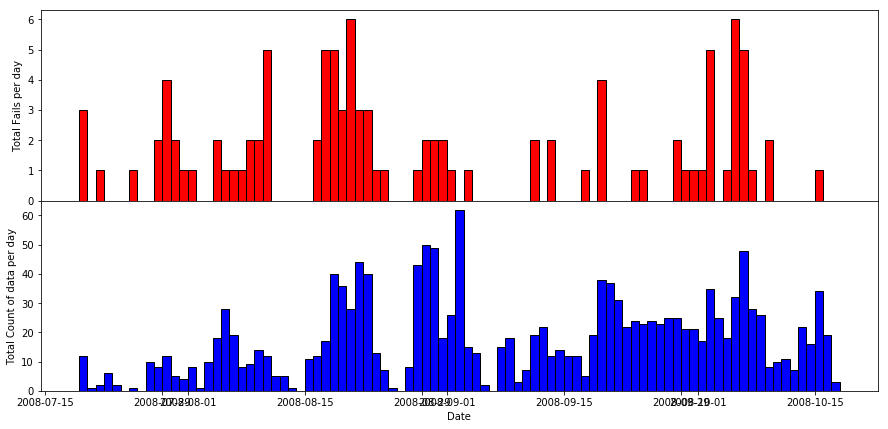

In [5]:
# Create a figure with shared X axis
fig, axs = plt.subplots(2, 1, sharex=True, figsize = (15,7))

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Set the width of the bars to be 1 day
width = np.timedelta64(1, 'D')

# Plot the Sum of fails per day and count of entries per day
axs[0].bar(label_day['Date'], label_day['Sum'], color = 'red', edgecolor = 'black', width = width)
axs[1].bar(label_day['Date'], label_day['Count'], color = 'blue', edgecolor = 'black', width = width)
axs[0].set_ylabel('Total Fails per day')
axs[1].set_ylabel('Total Count of data per day')
axs[1].set_xlabel('Date');

In [6]:
data_df = pd.read_csv('data/secom.data', sep=' ', header = None)
print('data_df shape = {}'.format(data_df.shape))
data_df.head()

data_df shape = (1567, 590)


,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [7]:
data_df_missing_count = data_df.isna().sum()
data_df_missing_count[data_df_missing_count > 100].sort_values(ascending = False)

293    1429
157    1429
158    1429
292    1429
85     1341
492    1341
220    1341
358    1341
517    1018
516    1018
384    1018
383    1018
382    1018
245    1018
246    1018
518    1018
244    1018
111    1018
110    1018
109    1018
580     949
581     949
579     949
578     949
72      794
346     794
73      794
345     794
247     715
112     715
385     715
519     715
568     273
563     273
567     273
566     273
569     273
565     273
564     273
562     273
547     260
546     260
556     260
555     260
554     260
553     260
552     260
551     260
550     260
549     260
548     260
557     260
dtype: int64

In [8]:
split_date = '2008-10-01'
y_train = labels_df['Label'][labels_df['Date'] < split_date]
y_test = labels_df['Label'][labels_df['Date'] >= split_date]

In [9]:
X_train = data_df.loc[y_train.index]
X_test = data_df.loc[y_test.index]

In [10]:
print('X_train, y_train, X_test, y_test shapes: {}, {}, {}, {}'\
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train, y_train, X_test, y_test shapes: (1208, 590), (1208,), (359, 590), (359,)


In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.impute import SimpleImputer
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [12]:
imp = SimpleImputer(strategy='mean')
imp = imp.fit(X_train)

X_train_imp = imp.transform(X_train)
X_test_imp = imp.transform(X_test)

In [13]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [14]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train_imp, y_train)
    y_pred = clf.predict(X_train_imp)
    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred)
    print('{} train AUC: {}'.format(name, metrics.auc(fpr, tpr)))
    y_pred = clf.predict(X_test_imp)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print('{} test AUC: {}\n'.format(name, metrics.auc(fpr, tpr)))

Nearest Neighbors train AUC: 0.5652969717974267
Nearest Neighbors test AUC: 0.4970326409495549

Linear SVM train AUC: 0.7359095438201274
Linear SVM test AUC: 0.51530887510116

RBF SVM train AUC: 1.0
RBF SVM test AUC: 0.5

Gaussian Process train AUC: 1.0
Gaussian Process test AUC: 0.5

Decision Tree train AUC: 0.7251657063639908
Decision Tree test AUC: 0.49258160237388726

Random Forest train AUC: 0.5
Random Forest test AUC: 0.5

Neural Net train AUC: 0.5599683749945847
Neural Net test AUC: 0.49258160237388726

AdaBoost train AUC: 0.8719512195121951
AdaBoost test AUC: 0.5093741570002697

Naive Bayes train AUC: 0.6448576874756313
Naive Bayes test AUC: 0.5735095764769356

QDA train AUC: 0.5304878048780488
QDA test AUC: 0.49851632047477745



C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [15]:
smt = SMOTE()
X_train_imp_smt, y_train_smt = smt.fit_sample(X_train_imp, y_train)

(array([1126.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1126.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

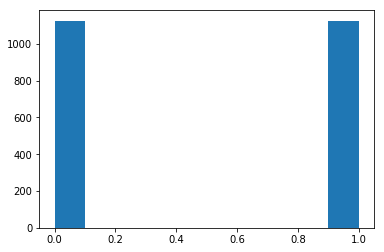

In [16]:
plt.hist(y_train_smt)

In [17]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train_imp_smt, y_train_smt)
    y_pred = clf.predict(X_train_imp_smt)
    fpr, tpr, thresholds = metrics.roc_curve(y_train_smt, y_pred)
    print('{} train AUC: {}'.format(name, metrics.auc(fpr, tpr)))
    y_pred = clf.predict(X_test_imp)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print('{} test AUC: {}\n'.format(name, metrics.auc(fpr, tpr)))

Nearest Neighbors train AUC: 0.8983126110124334
Nearest Neighbors test AUC: 0.4484758564877259

Linear SVM train AUC: 0.9285079928952042
Linear SVM test AUC: 0.5523334232533046

RBF SVM train AUC: 1.0
RBF SVM test AUC: 0.5

Gaussian Process train AUC: 1.0
Gaussian Process test AUC: 0.5

Decision Tree train AUC: 0.9076376554174066
Decision Tree test AUC: 0.5217156730509845

Random Forest train AUC: 0.9125222024866785
Random Forest test AUC: 0.49251416239546797

Neural Net train AUC: 0.9804618117229129
Neural Net test AUC: 0.5291340706770973

AdaBoost train AUC: 0.9715808170515098
AdaBoost test AUC: 0.5261667116266523

Naive Bayes train AUC: 0.6505328596802842
Naive Bayes test AUC: 0.6327893175074184

QDA train AUC: 1.0
QDA test AUC: 0.5



C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
